# **CUSTOMER SEGMENT**

## **1.Import libary**

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np
from datetime import datetime 

# data visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# remove warnings
import warnings
warnings.filterwarnings('ignore')



## **2.Reading Data**

In [2]:
#set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)

df_org = pd.read_csv("marketing_campaign.csv", sep="\t")
df_org.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df_org.shape

(2240, 29)

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# check missing values
df_org.isnull().sum()


ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
                  ..
AcceptedCmp2       0
Complain           0
Z_CostContact      0
Z_Revenue          0
Response           0
Length: 29, dtype: int64

In [6]:
# check duplicates
df_org.duplicated().sum()

0

**=>** The DataFrame needs cleaning before feature engineering:
- The “Income” column has 24 missing values.
- The “Dt_Customer” column is stored as an object in “dd-mm-yyyy” format instead of datetime64[ns].
- The “Education” and “Marital_Status” columns are categorical.

### **Cleanning Data**

In [7]:
# make a copy of original dataframe
df = df_org.copy()

In [8]:
# drop rows na values in Income column
df = df.dropna(subset=['Income'])
df.isnull().sum()

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
                 ..
AcceptedCmp2      0
Complain          0
Z_CostContact     0
Z_Revenue         0
Response          0
Length: 29, dtype: int64

In [9]:
#checking for categorial columns
cat_cols = df.select_dtypes(include=['object']).columns
for cat in cat_cols:
    print(f"\n Values count for {cat}: {df[cat].value_counts()}")
    print("-"*25)


 Values count for Education: Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
-------------------------

 Values count for Marital_Status: Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
-------------------------

 Values count for Dt_Customer: Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: count, Length: 662, dtype: int64
-------------------------


In [10]:
# convert the Dt_Customer column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Year'] = df['Dt_Customer'].dt.year


In [11]:
print ('Max date in dataset:', df['Dt_Customer'].max())
print ('Min date in dataset:', df['Dt_Customer'].min())

Max date in dataset: 2014-06-29 00:00:00
Min date in dataset: 2012-07-30 00:00:00


## **3. Feature engineering**

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year'],
      dtype='object')

**=> I will create new features based on existing columns:**
- Tenure → how long the customer has been with the company (since joining date).
- Recency → how long it has been since the last purchase until the current date.
- Total_Spent = Sum of ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
- Total_Purchases = Sum of['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumDealsPurchases']
- Living_Situation = alone / not_alone
- Education_Level = undergraduate / graduate / postgraduate
- Total_Children = Sum of ['Kidhome', 'Teenhome']
- Is_Parent = IF Total_Children > 0, Yes (1) ELSE No (0)
- Age = 2025 - Year_Birth
- Web_Ratio = ['NumWebPurchases'] / ['Total_Purchases']
- Store_Ratio = ['NumStorePurchases'] /['Total_Purchases']
- Deal_Ratio' = ['NumDealsPurchases'] / ['Total_Purchases']

In [13]:
# Calculate customer tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
latest_date = df['Dt_Customer'].max()
df['Tenure'] = (latest_date - df['Dt_Customer']).dt.days

In [14]:
# Calculate Customer's Active Days 
## Declare today's date
today_date_str = '2025-08-05'
today_date = pd.to_datetime(today_date_str, format= '%Y-%m-%d')

## Calculate 'Customer_Active_Days' 
df['Customer_Active_Days'] = (today_date - df['Dt_Customer']).dt.days

In [15]:
# Create new features
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 
                                             'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [16]:
# Calculate channel preferences
df['Web_Ratio'] = df['NumWebPurchases'] / df['Total_Purchases'].replace(0, np.nan)
df['Store_Ratio'] = df['NumStorePurchases'] / df['Total_Purchases'].replace(0, np.nan)
df['Deal_Ratio'] = df['NumDealsPurchases'] / df['Total_Purchases'].replace(0, np.nan)

In [17]:
# Living_Situation
df.loc[df['Marital_Status'].isin(['Together','Married']),'Living_Situation'] = 'alone'
df.loc[df['Marital_Status'].isin(['Single','Divorced','Widow','Alone','Absurd','YOLO']),'Living_Situation'] = 'not_alone'

#  Education_Level
df.loc[df['Education'].isin(['Graduation']),'Education_Level'] = 'undergraduate'
df.loc[df['Education'].isin(['Basic','2n Cycle']),'Education_Level'] = 'graduate'
df.loc[df['Education'].isin(['PhD','Master']),'Education_Level'] = 'postgraduate'

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Living_Situation,Education_Level
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,663,4718,1617,25,0.320000,0.160000,0.120000,not_alone,undergraduate
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,113,4168,27,6,0.166667,0.333333,0.333333,not_alone,undergraduate
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,312,4367,776,21,0.380952,0.476190,0.047619,alone,undergraduate
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,139,4194,53,8,0.250000,0.500000,0.250000,alone,undergraduate
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,161,4216,422,19,0.263158,0.315789,0.263158,alone,postgraduate


In [19]:
# Total_Children = Sum of ['Kidhome', 'Teenhome']
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Is_Parent = IF Total_Children > 0, Yes (1) ELSE No (0)
df['Is_Parent'] = np.where(df['Total_Children'] > 0, 1, 0)

# Age = 2025 - Year_Birth
df['Age'] = 2025 - df['Year_Birth']

In [20]:
plt.style.use('ggplot')


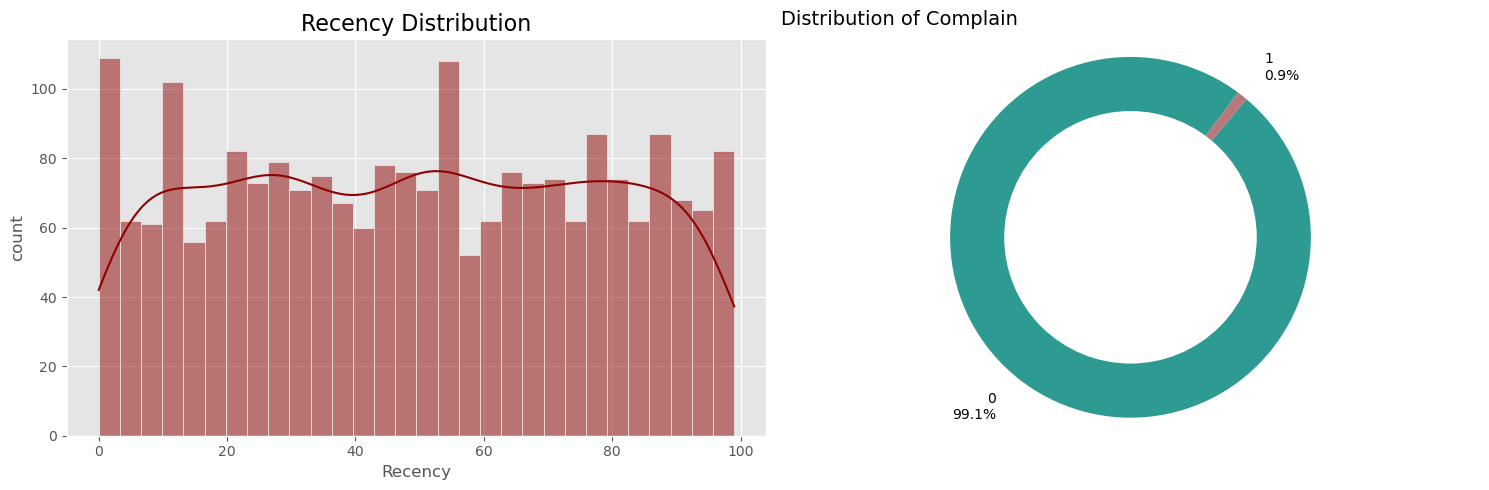

In [21]:
# Recency distribution
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
# Recency distribution (draw on the first axis)
sns.histplot(data=df, x='Recency', bins=30, kde=True, ax=axes[0], color='#8e0201')
axes[0].set_title('Recency Distribution', fontsize=16)
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('count')

# Complain distribution (pie) on the second axis
counts = df['Complain'].value_counts().sort_index()
labels = [f"{int(idx)}\n{count / len(df) * 100:.1f}%" for idx, count in counts.items()]
colors = ["#2e9b92", "#b67878"]

axes[1].pie(counts, labels=labels, startangle=50, counterclock=False,
            pctdistance=0.8, labeldistance=1.2, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title('Distribution of Complain', fontsize=14, loc='left', pad=10)
axes[1].axis('equal')

plt.tight_layout()
plt.show()



- A vast majority of the customers did not complain in the last two years.

- Majority of the customers made purchases via the Store.



In [22]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Tenure', 'Customer_Active_Days', 'Total_Spent',
       'Total_Purchases', 'Web_Ratio', 'Store_Ratio', 'Deal_Ratio',
       'Living_Situation', 'Education_Level', 'Total_Children', 'Is_Parent',
       'Age'],
      dtype='object')

In [23]:
drop_cols = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'NumDealsPurchases',
    'NumWebPurchases', 'NumStorePurchases']
df2 = df.copy()
df2.drop(drop_cols, axis = 1, inplace=True)

In [24]:
# Select features for clustering
# Define the desired feature list (order matters for downstream code)
df_features = [
    'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'Web_Ratio', 'Store_Ratio', 'Deal_Ratio', 
    'NumCatalogPurchases', 'NumWebVisitsMonth','AcceptedCmp1', 'AcceptedCmp2', 
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Response', 
    'Customer_Active_Days','Total_Spent', 'Living_Situation', 'Education_Level', 
    'Total_Children', 'Is_Parent', 'Age', 'Total_Purchases'
]

# Keep only the features that actually exist in df2 to avoid length mismatch
features = [f for f in df_features if f in df2.columns]

# Inform if anything expected is missing
missing = [f for f in df_features if f not in features]
if missing:
    print(f"Warning: the following expected features are not present in df2 and will be skipped: {missing}")

# 'features' will be used in the next cell (cluster_df = df[features].copy())

In [25]:
df2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Total_Children,Is_Parent,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2212.000000,2212.000000,2212.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.671029,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,2013.028430,353.521209,4408.521209,607.075361,14.880866,0.267265,0.409738,0.180577,0.947202,0.714350,56.179603
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,2.926734,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,0.685618,202.434667,202.434667,602.900476,7.670957,0.098456,0.118842,0.111044,0.749062,0.451825,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,4055.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,180.000000,4235.000000,69.000000,8.000000,0.200000,0.333333,0.076923,0.000000,0.000000,48.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,355.500000,4410.500000,396.500000,15.000000,0.260870,0.411765,0.166667,1.000000,1.000000,55.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,529.000000,4584.000000,1048.000000,21.000000,0.333333,0.500000,0.250000,1.000000,1.000000,66.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,28.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,699.000000,4754.000000,2525.000000,44.000000,1.000000,1.000000,1.000000,3.000000,1.000000,132.000000


### **Plotting some infomation**

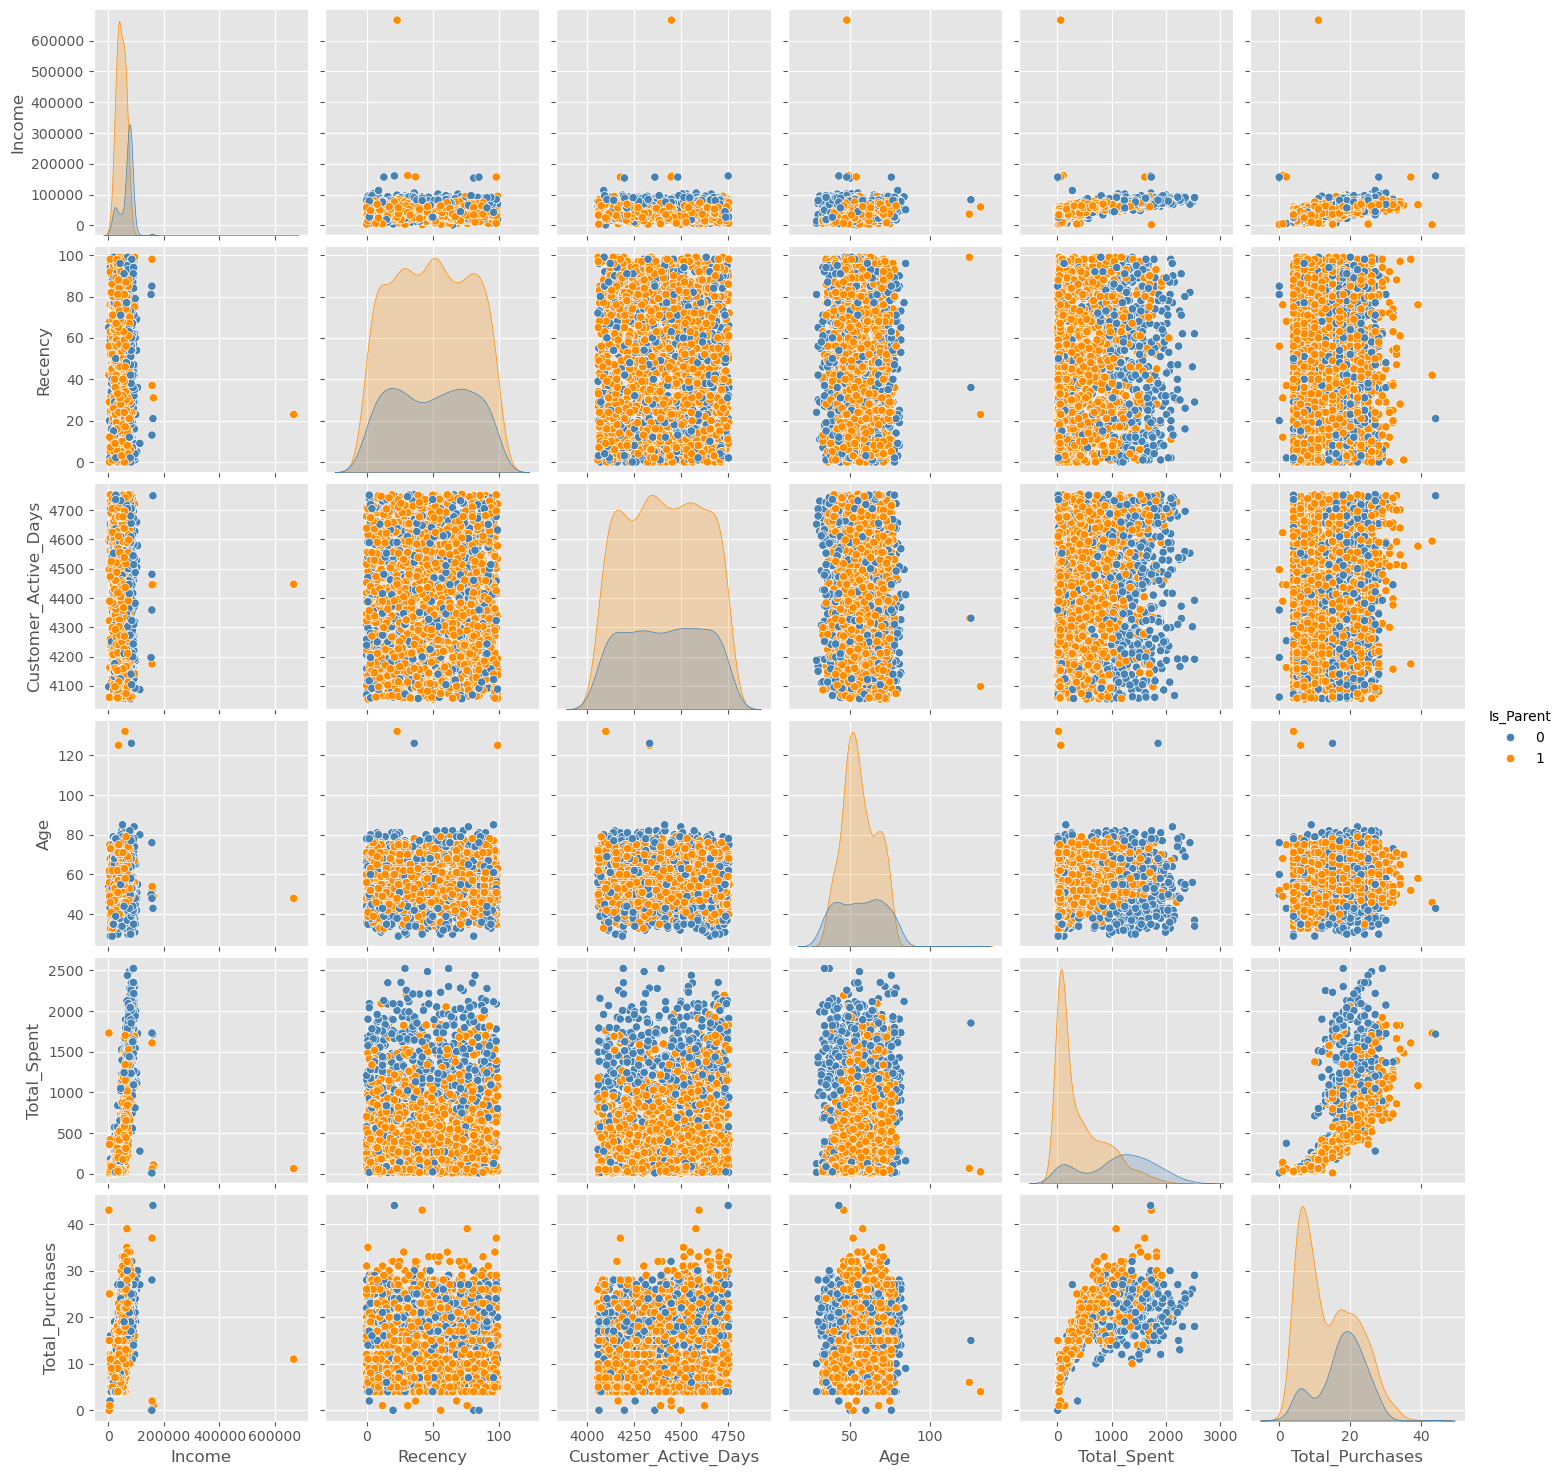

In [26]:
plotting_cols = ["Income", "Recency", "Customer_Active_Days", "Age", "Total_Spent", "Total_Purchases", "Is_Parent"]

sns.pairplot(data = df2[plotting_cols],
             hue = 'Is_Parent',
             palette= (['steelblue','darkorange'])
)
plt.show()

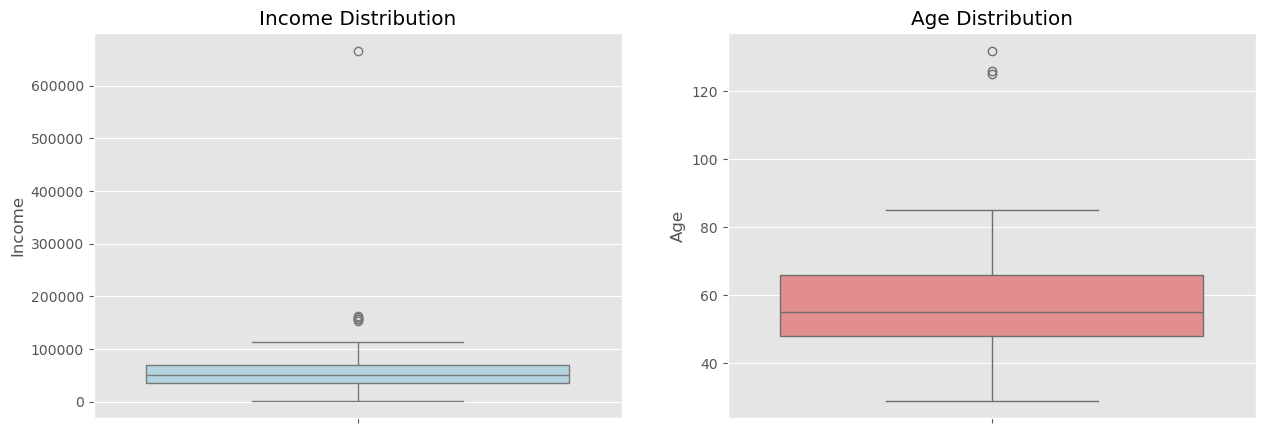

In [27]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
# boxplot for Income
sns.boxplot(y=df['Income'], ax=axes[0], color='lightblue')
axes[0].set_title('Income Distribution')

# boxplot for Age
sns.boxplot(y=df['Age'], ax=axes[1], color='lightcoral')
axes[1].set_title('Age Distribution')

plt.show()

**Clearly, there are a few outliers in the Income and Age features. I will remove the outlier in the data using IQR rule .**

In [29]:
# Calculate upper and lower bounds for Income
q1_income = np.percentile(df2['Income'], 25)
q2_income = np.percentile(df2['Income'], 50)
q3_income = np.percentile(df2['Income'], 75)
iqr_income = q3_income - q1_income
lower_bound_income = q1_income - 1.5 * iqr_income
upper_bound_income = q3_income + 1.5 * iqr_income


# Calculate upper and lower bounds for Age
q1_age = np.percentile(df2['Age'], 25)
q2_age = np.percentile(df2['Age'], 50)
q3_age = np.percentile(df2['Age'], 75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age

print ('Bound for Income:', lower_bound_income, 'to', upper_bound_income)
print ('Bound for Age:', lower_bound_age, 'to', upper_bound_age)

Bound for Income: -14525.5 to 118350.5
Bound for Age: 21.0 to 93.0


In [30]:
#remove outliers
df2 = df2[(df2['Income'] >= lower_bound_income) & (df2['Income'] <= upper_bound_income)]
df2 = df2[(df2['Age'] >= lower_bound_age) & (df2['Age'] <= upper_bound_age)]


Next, look at the correlation amongst the features. (Excluding the categorical attributes at this point)

Text(0.5, 1.0, 'Correlation Matrix')

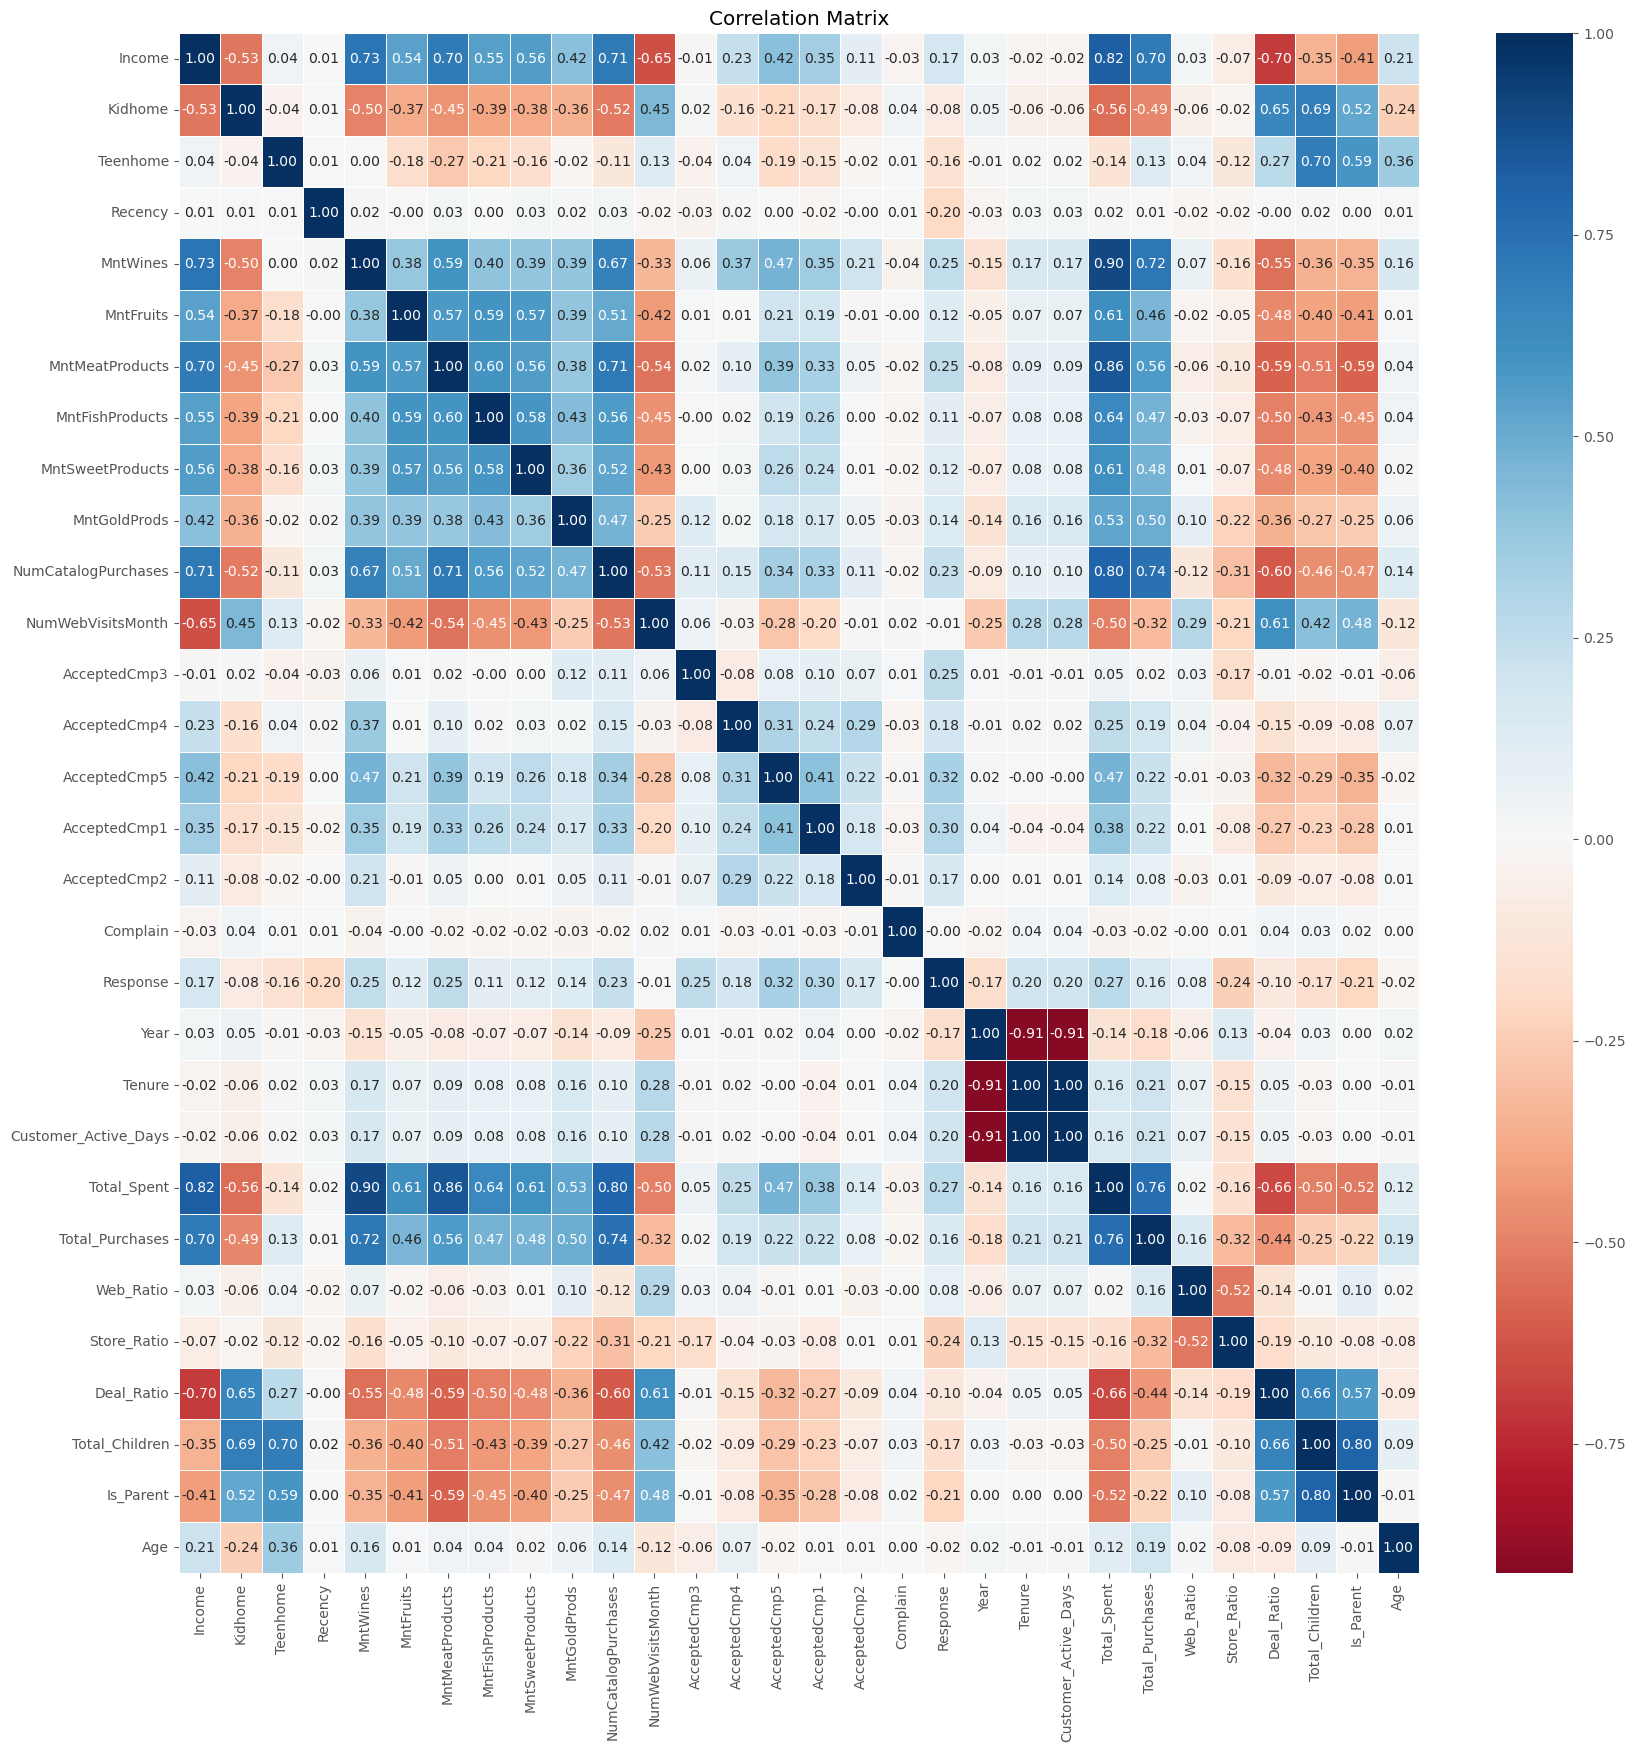

In [31]:
# correlation matrix (use only numeric columns to avoid conversion errors)
corr_matrix = df2.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdBu',
            center=0,
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Matrix')

The data is quite clean and the new features have been included. 

## 4.PreProcessing Data

In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [33]:
# get list of catagorical columns
obj = (df2.dtypes == 'object')
obj_cols = list(obj[obj].index)
print ('Categorical collumn are:', obj_cols)

Categorical collumn are: ['Education', 'Living_Situation', 'Education_Level']


In [34]:
LE = LabelEncoder()
for col in obj_cols:
    df2[col] = df2[[col]].apply(LE.fit_transform)

print ('Label Encoding categorical columns completed.')
print ('Sample after LabelEncoding:')
print (df2[obj_cols].head())


Label Encoding categorical columns completed.
Sample after LabelEncoding:
   Education  Living_Situation  Education_Level
0          2                 1                2
1          2                 1                2
2          2                 0                2
3          2                 0                2
4          4                 0                1


In [35]:
# creating a new df , renainning only the features needed for clustering
drop_col = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

input_df = df2.copy()
input_df.drop(drop_col, axis=1, inplace=True)
input_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumWebVisitsMonth,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Living_Situation,Education_Level,Total_Children,Is_Parent,Age
0,2,58138.0,0,0,58,635,88,546,172,88,88,10,7,2012,663,4718,1617,25,0.320000,0.160000,0.120000,1,2,0,0,68
1,2,46344.0,1,1,38,11,1,6,2,1,6,1,5,2014,113,4168,27,6,0.166667,0.333333,0.333333,1,2,2,1,71
2,2,71613.0,0,0,26,426,49,127,111,21,42,2,4,2013,312,4367,776,21,0.380952,0.476190,0.047619,0,2,0,0,60
3,2,26646.0,1,0,26,11,4,20,10,3,5,0,6,2014,139,4194,53,8,0.250000,0.500000,0.250000,0,2,1,1,41
4,4,58293.0,1,0,94,173,43,118,46,27,15,3,5,2014,161,4216,422,19,0.263158,0.315789,0.263158,0,1,1,1,44


In [36]:
scaler = StandardScaler()
scaler.fit(input_df)
scaled_df = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)
print ('Scaling completed. Sample of scaled data:')
scaled_df.head()

Scaling completed. Sample of scaled data:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumCatalogPurchases,NumWebVisitsMonth,Year,Tenure,Customer_Active_Days,Total_Spent,Total_Purchases,Web_Ratio,Store_Ratio,Deal_Ratio,Living_Situation,Education_Level,Total_Children,Is_Parent,Age
0,-0.350162,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,2.628526,0.689203,-1.498307,1.527183,1.527183,1.679323,1.328161,0.535375,-2.131431,-0.546937,1.347625,0.892338,-1.266589,-1.58466,1.017189
1,-0.350162,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.588043,-0.139645,1.417639,-1.188629,-1.188629,-0.963897,-1.167390,-1.031849,-0.654214,1.378731,1.347625,0.892338,1.403420,0.63105,1.273530
2,-0.350162,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.230646,-0.554069,-0.040334,-0.205999,-0.205999,0.281242,0.802782,1.158370,0.563272,-1.200289,-0.742046,0.892338,-1.266589,-1.58466,0.333612
3,-0.350162,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.945440,0.274779,1.417639,-1.060245,-1.060245,-0.920675,-0.904700,-0.180097,0.766187,0.626517,-0.742046,0.892338,0.068415,0.63105,-1.289883
4,1.432997,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,0.126750,-0.139645,1.417639,-0.951612,-0.951612,-0.307248,0.540092,-0.045610,-0.803730,0.745287,-0.742046,-0.571654,0.068415,0.63105,-1.033542


In [38]:
scaled_df.shape

(2205, 26)

## Customer Segment and Dimension Reduction using KMean 

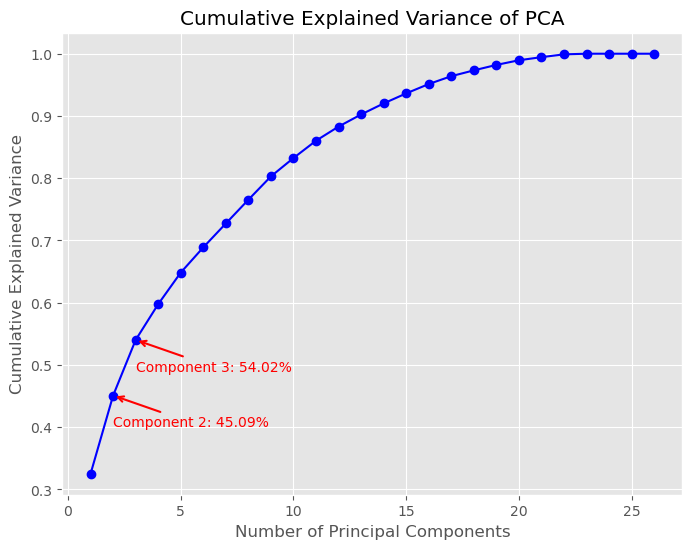

In [40]:
plt.style.use('ggplot')

# PCA requires no NaNs — reuse an existing imputer if available, otherwise create one
X_input = np.asarray(scaled_df)

try:
    # if 'imputer' exists and is fitted use it
    X_clean = imputer.transform(X_input)
except NameError:
    # create and fit a SimpleImputer (median) if no imputer exists yet
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X_clean = imputer.fit_transform(X_input)

# apply PCA on the imputed data
pca = PCA()
X_pca = pca.fit_transform(X_clean)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance,
         marker='o',
         linestyle='-',
         color='b')
plt.title('Cumulative Explained Variance of PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Annotate only if those components exist
if len(cumulative_explained_variance) >= 2:
    plt.annotate(f'Component 2: {cumulative_explained_variance[1]*100:.2f}%',
                 xy=(2, cumulative_explained_variance[1]),
                 xytext=(2, cumulative_explained_variance[1] - 0.05),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5, color='red'),
                 color='red'
                 )

if len(cumulative_explained_variance) >= 3:
    plt.annotate(f'Component 3: {cumulative_explained_variance[2]*100:.2f}%',
                 xy=(3, cumulative_explained_variance[2]),
                 xytext=(3, cumulative_explained_variance[2] - 0.05),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5, color='red'),
                 color='red'
                 )

plt.show()

Clearly, the less Principal Components (Dimensions) the less explained proportion they can "explained"
- Case 1: 2 Components (45.93%)
- Case 2: 3 Components (52.70%)
But for this project, I want to use case 2: components 3 with the best visualization .(52.70%)

#### Dimensional Reduction

In [41]:
# Reduce dimensions
# Ensure there are no NaNs before applying PCA (PCA does not accept NaN)
X_input = np.asarray(scaled_df)

try:
	# reuse an existing imputer if available
	X_clean = imputer.fit_transform(X_input)
except NameError:
	from sklearn.impute import SimpleImputer
	imputer = SimpleImputer(strategy='median')
	X_clean = imputer.fit_transform(X_input)

pca_3dim = PCA(n_components=3)
X_pca_3dim = pca_3dim.fit_transform(X_clean)
X_pca_3dim

array([[ 5.25019043,  2.98388241, -0.78334146],
       [-3.06615534, -1.70307326,  1.76846447],
       [ 2.33778226, -0.8349404 , -0.84972446],
       ...,
       [ 2.01626789, -2.73464015, -1.40732849],
       [ 1.62891115, -1.65266438,  2.30581865],
       [-2.30402781,  2.60515713,  0.87487591]])

In [42]:
PCA_df_dim = pd.DataFrame(data=X_pca_3dim, columns=['PC1', 'PC2', 'PC3'])
PCA_df_dim.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2205.0,-5.155866e-17,2.908480,-6.448102,-2.657873,-0.761358,2.393054,7.624575
PC2,2205.0,4.189141e-17,1.807777,-4.536676,-1.407474,-0.064855,1.351937,4.238935
PC3,2205.0,6.444832e-18,1.524066,-4.773429,-1.110741,0.054009,1.159241,4.849952


Note: you may need to restart the kernel to use updated packages.


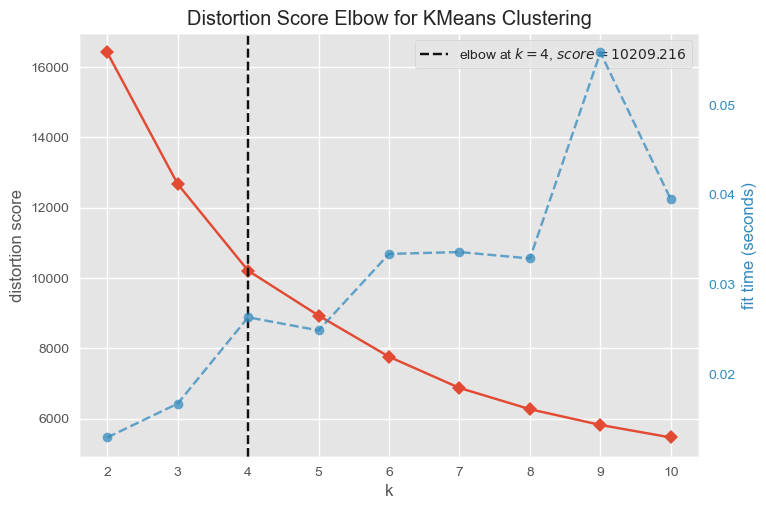

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# install yellowbrick if not already available (necessary for KElbowVisualizer)
%pip install -q yellowbrick

# import the elbow visualizer
from yellowbrick.cluster import KElbowVisualizer

plt.style.use('ggplot')

# use a sensible range for k (e.g., 2-10). KElbowVisualizer expects an iterable for k.
elbow = KElbowVisualizer(KMeans(n_init=10, random_state=42), k=10)
elbow.fit(PCA_df_dim)
elbow.show()

In [51]:
# apply KMeans with the optimal number of clusters (k=4 from elbow method)
kmeans_dim = KMeans(n_clusters=4, n_init=10, random_state=42)
cluster_dim = kmeans_dim.fit_predict(X_pca_3dim)


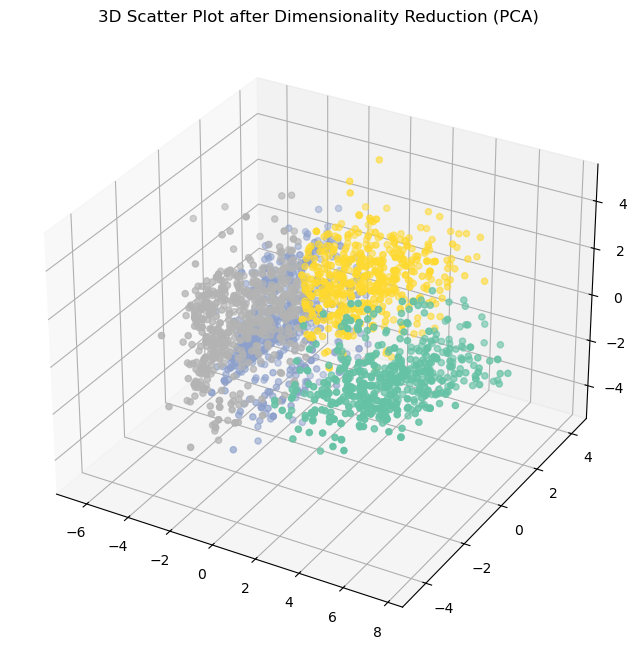

In [49]:
plt.style.use('default')

x = PCA_df_dim['PC1']
y = PCA_df_dim['PC2']
z = PCA_df_dim['PC3']

#Plotting 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c= cluster_dim, cmap = 'Set2_r', marker='o')
ax.set_title('3D Scatter Plot after Dimensionality Reduction (PCA)')
plt.show()

In [52]:
df2['Cluster'] = kmeans_dim.labels_

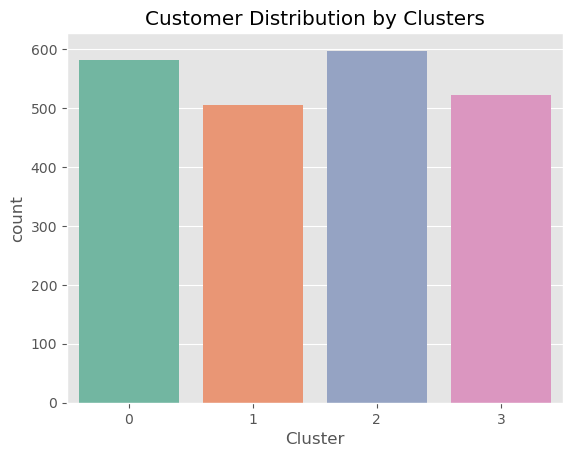

In [54]:
df_cluster_count = df2.groupby(by = 'Cluster',as_index = False).agg(count = ('Cluster','count')).sort_values(by = 'Cluster',ascending=True)

plt.style.use('ggplot')

sns.barplot(data = df_cluster_count
            ,x = 'Cluster'
            ,y = 'count'
            ,palette='Set2')

plt.title('Customer Distribution by Clusters')
plt.show()

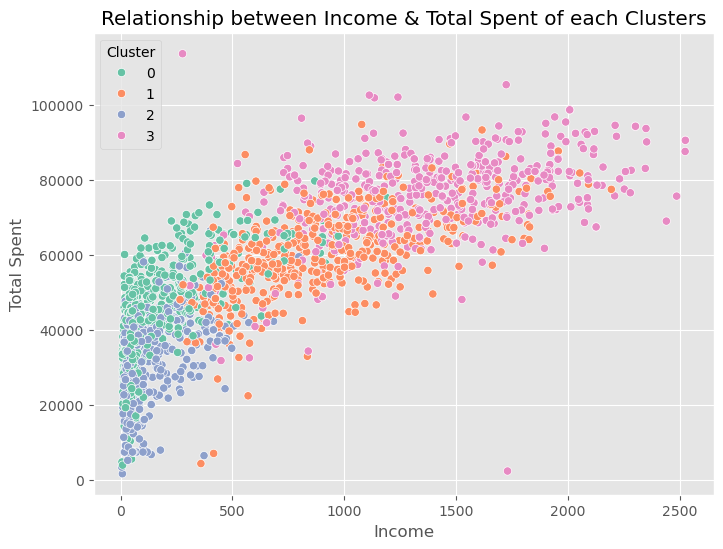

In [55]:
plt.figure(figsize = (8,6))

sns.scatterplot(data = df2
                , y = 'Income'
                , x = 'Total_Spent'
                , hue = 'Cluster'
                , palette= 'Set2')

plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Relationship between Income & Total Spent of each Clusters')

plt.show()

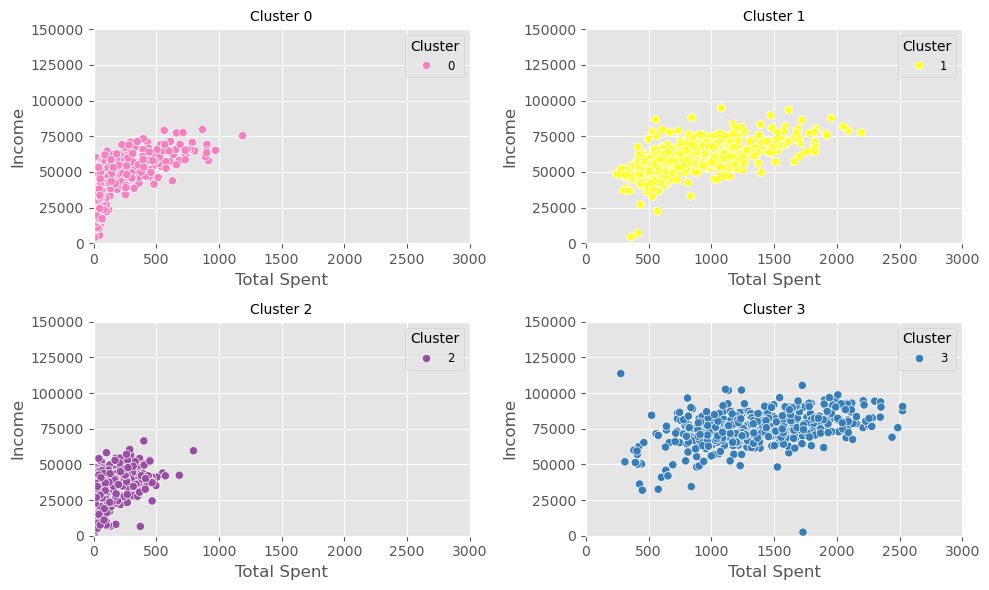

In [60]:
custom_palette = sns.color_palette("Set1_r", n_colors=len(df2['Cluster'].unique()))

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, cluster in enumerate(sorted(df2['Cluster'].unique())):
    row, col = divmod(i, 2)
    sns.scatterplot(data=df2[df2['Cluster'] == cluster], y='Income', x='Total_Spent', hue='Cluster', palette=[custom_palette[cluster]], ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}',size = 10)
    axes[row, col].set_ylabel('Income',size = 12 )
    axes[row, col].set_xlabel('Total Spent', size = 12)
    axes[row, col].legend(title='Cluster', fontsize='small', title_fontsize='medium')
    axes[row, col].set_ylim(0, 150000)
    axes[row, col].set_xlim(0, 3000)

plt.tight_layout()
plt.show()

In [61]:
df2['Total_PromoAccepted'] = df2["AcceptedCmp1"]+ df2["AcceptedCmp2"]+ df2["AcceptedCmp3"]+ df2["AcceptedCmp4"]+ df2["AcceptedCmp5"]

print('Range of Total_PromoAccepted: ', df2['Total_PromoAccepted'].unique())

Range of Total_PromoAccepted:  [0 1 2 3 4]


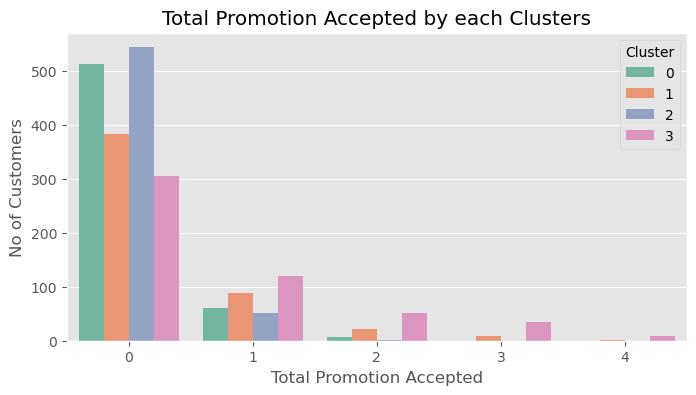

In [63]:
df_promoCnt = df2.groupby(by = ['Cluster','Total_PromoAccepted'],as_index = False).agg(count = ('Total_PromoAccepted','count')).sort_values(by = 'Cluster',ascending=True)

plt.figure(figsize=(8,4))

sns.barplot(data = df_promoCnt
            ,x = 'Total_PromoAccepted'
            ,y = 'count'
            ,hue = 'Cluster'
            ,palette='Set2')

plt.xlabel('Total Promotion Accepted')
plt.ylabel('No of Customers')
plt.title('Total Promotion Accepted by each Clusters')
plt.legend(title = 'Cluster', loc = 'upper right')
plt.show()

I will find Customer Profile by 2 type of identity:

- Identity 1: ['Kidhome', 'Teenhome', 'Living_Situation', 'Education_Level', 'Total_Children', 'Is_Parent']
- Identity 2: ['Customer_Active_Days', 'Age']
- Indentity 3: ['Web_Ratio', 'Store_Radio','Deal_Ratio']

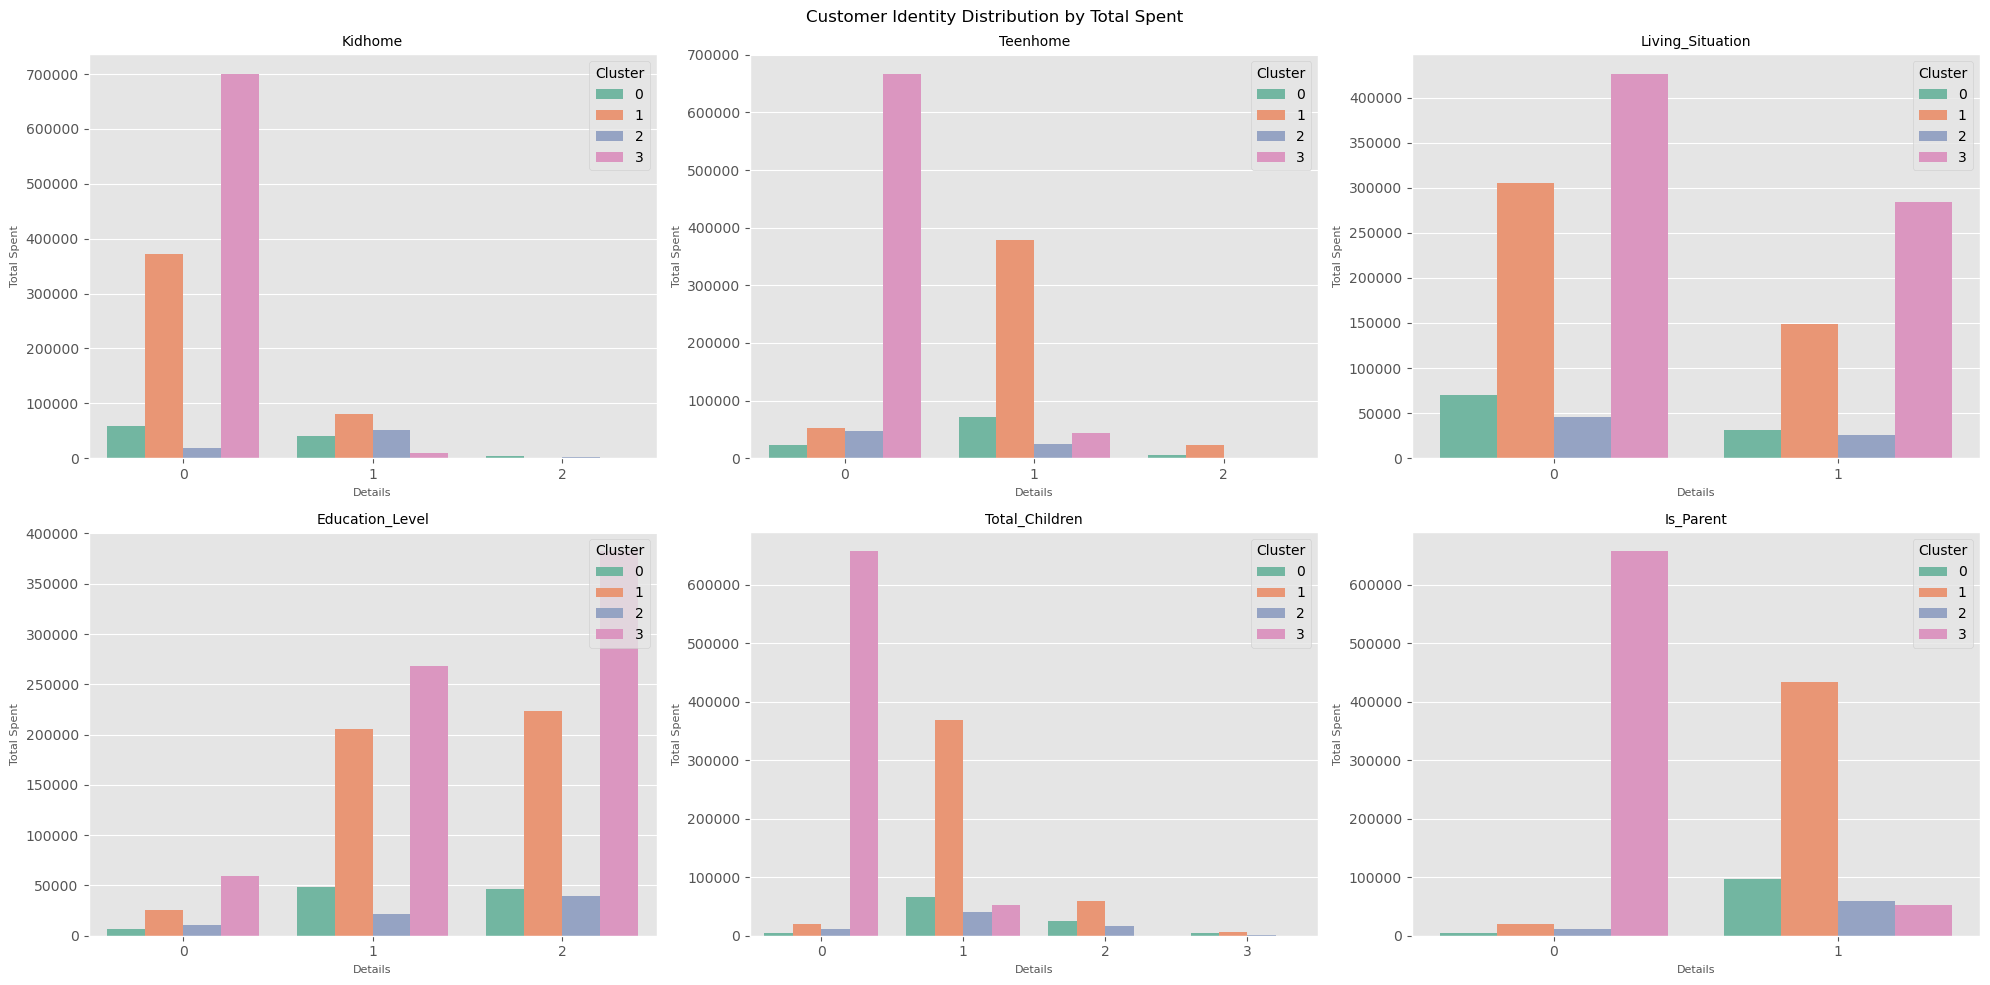

In [65]:
identity1 = ['Kidhome', 'Teenhome', 'Living_Situation',
                      'Education_Level', 'Total_Children', 'Is_Parent']

fig, axes = plt.subplots(nrows=2, ncols= 3, figsize=(20, 10))

for i, feature in enumerate(identity1):
    df_identity = df2.groupby(by=['Cluster', feature], as_index=False).agg(Total_Spent=('Total_Spent', 'sum'))

    sns.barplot(data=df_identity, x=feature, y='Total_Spent', hue='Cluster', palette='Set2', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(feature, size = 10)
    axes[i // 3, i % 3].set_xlabel('Details', size = 8)
    axes[i // 3, i % 3].set_ylabel('Total Spent',size = 8)
    axes[i // 3, i % 3].legend(loc = 'upper right', title = 'Cluster')

plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()

Identity 2: ['Customer_Active_Days', 'Age']


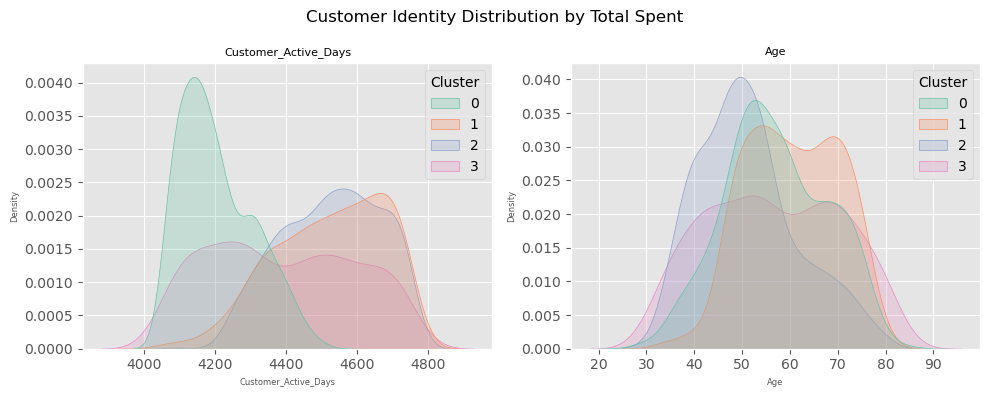

In [68]:
identity2 = ['Customer_Active_Days', 'Age']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, feature in enumerate(identity2):
    sns.kdeplot(data=df2, x=feature, hue='Cluster', palette='Set2', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(feature, size = 8)
    axes[i].set_xlabel(feature, size = 6)
    axes[i].set_ylabel('Density',size = 6)

plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()

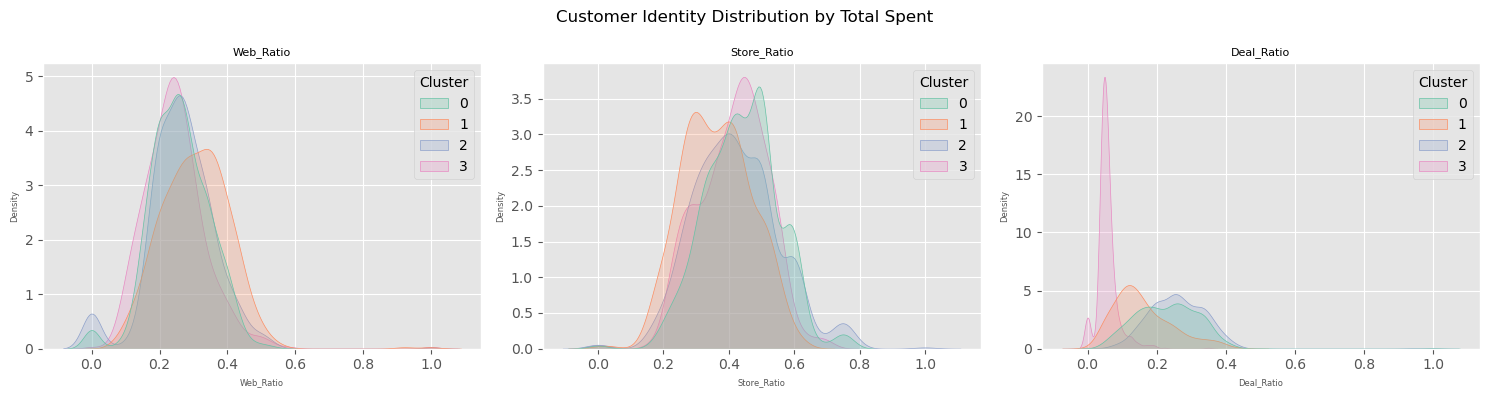

In [69]:
identity3 = ['Web_Ratio', 'Store_Ratio','Deal_Ratio']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, feature in enumerate(identity3):
    sns.kdeplot(data=df2, x=feature, hue='Cluster', palette='Set2', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(feature, size = 8)
    axes[i].set_xlabel(feature, size = 6)
    axes[i].set_ylabel('Density',size = 6)
plt.suptitle('Customer Identity Distribution by Total Spent')
plt.tight_layout()
plt.show()

In [ ]:
# nhanh: in tóm tắt dễ đọc cho mỗi cluster
key_feats = ['Income','Total_Spent','Total_Purchases','Age','Customer_Active_Days','Total_PromoAccepted']
cat_feats = ['Living_Situation','Education_Level']

clusters = sorted(df2['Cluster'].unique())
global_mean = df2[key_feats].mean()

for cl in clusters:
    sub = df2[df2['Cluster']==cl]
    n = len(sub)
    print(f"\nCluster {cl} — {n} customers ({n/len(df2):.1%})")
    means = sub[key_feats].mean().round(2)
    medians = sub[key_feats].median().round(2)
    # so với trung bình chung -> mô tả ngắn
    diffs = (means - global_mean).round(2)
    summary_flags = []
    for f in ['Total_Spent','Income','Customer_Active_Days','Total_PromoAccepted']:
        tag = 'higher' if diffs[f] > 0 else 'lower' if diffs[f] < 0 else 'near avg'
        summary_flags.append(f"{f}:{tag}")
    print("  Quick profile:", ", ".join(summary_flags))
    print("  Means:")
    for f in key_feats:
        print(f"    {f:18s} mean={means[f]:10}  median={medians[f]:10}")
    # categorical modes
    for cf in cat_feats:
        if cf in sub.columns:
            mode = sub[cf].mode()
            mode = mode.iloc[0] if not mode.empty else None
            print(f"  {cf:18s} mode={mode}")
    # representative customer (closest to PCA centroid) if available
    try:
        idxs = np.where(cluster_dim == cl)[0]
        centroid = X_pca_3dim[idxs].mean(axis=0)
        rep = idxs[np.argmin(np.linalg.norm(X_pca_3dim[idxs]-centroid,axis=1))]
        print("  Representative index:", rep)
    except Exception:
        pass
